<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y regresión.
* Regresión lineal ordinaria (mínimos cuadrados).
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* Reducción de dimensionalidad: PCA e ICA.
* Selección de hiper-parámetros estructurales de modelos de aprendizaje.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 4 Octubre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Máquinas de aprendizaje aplicadas a la medicina  
[2.](#segundo) Estimación de edad de personas

# Enunciado

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
En el area de la salud, diagnosticar la enfermedad de una persona de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer errores.  
Pongámonos en el contexto de que usted es contratado para utilizar técnicas de aprendizaje de máquina para asistir en un problema médico como es la detección de enfermedades cardiacas. El diagnóstico de una enfermedad cardiaca se realiza a través de signos clínicos y resultados de pruebas médicas, los cuales usted deberá utilizar en busca del comportamiento normal y anormal de los pacientes, para así obtener un modelo que prediga si el paciente en efecto presenta una enfermedad o no.


<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />


Los datos para trabajar junto a su documentación pueden ser descargados ejecutando los siguientes comandos en un terminal (*sistemas UNIX*):
```
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc
```

---
Cargue los datos a trabajar en un *dataframe* de pandas. Exprese las variables que tienen valores categóricos en su estructura original, para así tener una información más clara de lo que significa en un comienzo. 
```python
import pandas as pd
import numpy as np
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'
```

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).
```python
df.head()
df.info()
df.describe()
```

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**
```python
df = pd.get_dummies(df)
df.head()
```

### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.
```python
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values
```

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.
```python
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
...
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
...
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)
```

> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 
```python
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)
```

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
```

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?


> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
```

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.
```python
from sklearn.model_selection import KFold
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
```

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 
```python
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()
```

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
... #plot again
```

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?
```python
from ipywidgets import interactive
def train_model(param):
    model = #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))
```

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]
```

> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?
```python
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
```


### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.
```python
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 
```

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).
```python
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)
```

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente
```python
from sklearn.decomposition import FastICA
...
```

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
mat_file = sio.loadmat("event.mat")
```
Mientras que para acceder a la información como tal:
```python
data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target
...
genFeat = data[0]   # Contextual features
ffcoefs = data[3]   # Fisherface space
faceGist = data[4]  # GIST features
...
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).
```python
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.

# Desarrollo

## 1. Máquinas de aprendizaje aplicadas a la medicina

### Importación de librerías y datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://p

### Primera parte:

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).
```python
df.head()
df.info()
df.describe()
```

In [3]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


In [5]:
df['normal'][df['normal'] == 1] = 'Absence'
df['normal'][df['normal'] == 2] = 'Presence'

D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
boxplot = df.boxplot(column=['blood_p','max_heart'], by = 'normal', figsize=(8,5))
boxplot = df.boxplot(column=['oldpeak','vessel'], by = 'normal', figsize=(8,5))
boxplot = df.boxplot(column=['serum'], by = 'normal', figsize=(3.5,5))
boxplot = df.boxplot(column=['age'], by = 'normal', figsize=(3.5,5))

A simple viste se aprecia que todas las variables tienen distinta distribución al presentar o no la enfermedad. Pero es mas notoria esta diferencia en max_head, vessel y oldpeak

In [7]:
df[['normal','sex','age']].groupby(['sex','normal']).count()

age
sex    normal       
female Absence    67
       Presence   20
male   Absence    83
       Presence  100

En la tabla anterior se puede apreciar que hay mas porcentaje hombres (del total de hombres) que tienen presencia de la enfermedad que el porcentaje de mujeres (del total de mujeres). Para las siguientes tablas se puede hacer el mismo análisis:

In [8]:
df[['normal','chest_pain','age']].groupby(['chest_pain','normal']).count()

age
chest_pain       normal       
asymptomatic     Absence    38
                 Presence   91
atypical angina  Absence    35
                 Presence    7
non-anginal pain Absence    62
                 Presence   17
typical angina   Absence    15
                 Presence    5

In [9]:
df[['normal','blood_s','age']].groupby(['blood_s','normal']).count()

age
blood_s               normal       
greater than 120mg/ml Absence    23
                      Presence   17
lower than 120mg/ml   Absence   127
                      Presence  103

In [10]:
df[['normal','electro','age']].groupby(['electro','normal']).count()

age
electro                      normal       
ST-T wave abnormality        Absence     1
                             Presence    1
left ventricular hypertrophy Absence    64
                             Presence   73
normal                       Absence    85
                             Presence   46

In [11]:
df[['normal','angina','age']].groupby(['angina','normal']).count()

age
angina normal       
no     Absence   127
       Presence   54
yes    Absence    23
       Presence   66

In [12]:
df[['normal','slope','age']].groupby(['slope','normal']).count()

age
slope       normal       
downsloping Absence     8
            Presence   10
flat        Absence    44
            Presence   78
upsloping   Absence    98
            Presence   32

In [13]:
df[['normal','thal','age']].groupby(['thal','normal']).count()

age
thal              normal       
fixed defect      Absence     6
                  Presence    8
normal            Absence   119
                  Presence   33
reversable defect Absence    25
                  Presence   79

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**
```python
df = pd.get_dummies(df)
df.head()
```

In [14]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,...,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,normal_Absence,normal_Presence
0,70.0,130.0,322.0,109.0,2.4,3.0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,1
1,67.0,115.0,564.0,160.0,1.6,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,57.0,124.0,261.0,141.0,0.3,0.0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,1,0
4,74.0,120.0,269.0,121.0,0.2,1.0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


Los algoritmos de Machine Learning no pueden procesar variables que tengan formato de texto o cualquier otro que no sea numérico, de ahí la importancia de este paso en el preprocesamiento de los datos.

### Predecir la presión sanguínea


En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.


In [15]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Programas\Anaconda\lib\site-packages\ipyker

In [16]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


In [17]:
class_label = df.pop('normal').values - 1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values

df = pd.get_dummies(df)

X_data = df.values


> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.
```python
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
...
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
...
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)
```


In [18]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)



> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 


In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

La normalización se lleva a cabo para dejar las variables con una escala común, tal que ninguna variable pueda experimentar más importancia que otra para predecir sólo por el hecho de que están medidas en unidades diferentes o porque tienen naturaleza distinta.


> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
```


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression(fit_intercept=True)
reg = model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

In [21]:
error_y_menos_fx = []
error_cuadratico = []
for i in range(reg_label_train.shape[0]):
  error_y_menos_fx.append((reg_label_train[i] - reg_pred_train[i]))
  error_cuadratico.append((reg_label_train[i] - reg_pred_train[i])**2)
print(error_cuadratico)

[30.985979009453192, 1496.4321989075552, 94.53915229877155, 0.3066435977470089, 486.47817375310063, 128.27230155654428, 70.02151259833586, 437.7936280045953, 59.484285985477044, 1.8318625996897318, 37.13073759759843, 168.09226374398537, 348.73476540012615, 0.5037279544443888, 103.0413566220705, 732.3454425261492, 118.08304393521976, 247.35998300755438, 16.862107063503338, 81.06443318158267, 81.80124270530732, 7.7871023018880345, 165.99555588744292, 416.61468856412165, 1212.2691801196954, 237.19293096637028, 0.0268436968398118, 412.48886120471235, 10.025422099813694, 24.80055034406044, 592.8986553197514, 203.98640612208476, 6.315075377294757, 900.120018844243, 61.55571534197393, 114.262476518177, 214.4967819046894, 28.066178242348933, 906.1372061543696, 270.4451922106635, 23.20809199634746, 38.711393192338384, 117.87128947764046, 33.06275938336615, 2030.549960448581, 2.347542937709852, 293.99200381255906, 176.2880805039454, 3.9689978776608275, 283.769102562573, 280.74948178023607, 367.6

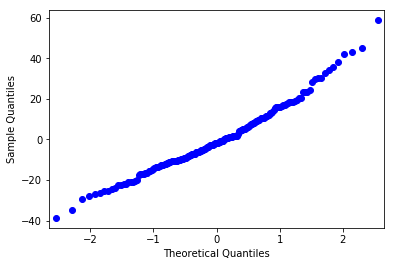

In [22]:
import statsmodels.api as sm
import pylab

sm.qqplot(np.array(error_y_menos_fx))
pylab.show()

A partir del gráfico quantile-quantile se puede determinar que sí es razonable la hipótesis de que los residuos del modelo tienen una distribución normal, pues en el gráfico se puede distinguir que los puntos forman una aproximación de línea recta. Cabe destacar que no se entrega ninguna distribución como parámetro a la función "sm.qqplot()" dado que por defecto utiliza una distribución normal para comparar.


> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?



In [23]:
#Z-score
theta_hat = 0
suma = 0
for y in reg_label_train:
  suma += (y + reg_label_train.mean())**2
n = len(reg_label_train)
d = X_train.shape[1]
theta_had = suma/(n-d-1)

z_score_j = []
for j in range(X_train.shape[1]):
  z_score_j.append(model.coef_[j]/(theta_had*((X_train.T.dot(X_train))[j,j])**(-1)))
z_score_j.append(model.intercept_/(theta_had*((X_train.T.dot(X_train))[j,j])**(-1)))

In [24]:
z_score_j

[25.688529487605404,
 329.05483134528237,
 4.188215063897769,
 0.020294262497814016,
 -0.005256061786921786,
 0.0007220711996143064,
 -0.001693585177277193,
 -0.00017511945623929166,
 0.0002738750208769914,
 -0.0007359170247496198,
 0.00018294330924744902,
 0.0004563653248022885,
 -0.0029024834657425556,
 5.278769246350235e-05,
 0.00045788274608275884,
 -0.0008823987596847505,
 0.00020819588192396807,
 -0.00011372043970636884,
 0.00018950821044984753,
 -0.0010172636629735892,
 0.00036023968598856304,
 0.00015076644658778163,
 -0.001283241909483155,
 0.0004696499428882183,
 0.11535580305076926]

In [25]:
#Valores F-score obtenidos por funcion implementada segun lo visto en clases

# ro de la variable i
def ro_i(X,Y,i):
  
  X_i = X[:,i] # columna i, es decir, la caracteristica i
  
  var_X_i = np.var(X_i, dtype=np.float64)
  var_Y = np.var(Y, dtype=np.float64)
  
  cov_X_i_Y = np.cov(X_i,Y)[0,1]
  
  return cov_X_i_Y/((var_X_i*var_Y)**(1/2))

# fscore de la variable i
def fscore_i(X,Y,i):
  
  ro = ro_i(X,Y,i)
  
  return ((X.shape[0] - 2) * ro**2)/(1 - ro**2)
  

In [26]:
fscores = []
for i in range(Xstd_train.shape[1]):
  fscores.append(fscore_i(Xstd_train,reg_label_train,i))
np.array(fscores)

array([15.84125664,  6.72568484,  2.59152144,  8.40194216,  0.84252927,
        2.4022139 ,  2.4022139 ,  0.54605037,  0.4766754 ,  0.56328498,
        0.75463383,  5.39203965,  5.39203965,  4.85607349,  3.51861833,
        5.50758384,  0.43691565,  0.43691565,  5.41242276,  0.01593739,
        1.60124226,  0.15495215,  1.29026691,  0.92132725])

In [27]:
# Crear tabla

d = {} 
d["i-Predictor"] = []

for i in range(len(fscores)):
  d["i-Predictor"].append(i)

d["Z-Score"] = z_score_j[:-1]
d["F-Score"] = fscores  
d["Peso"] = abs(reg.coef_)
  
tabla = pd.DataFrame(d)
tabla

,i-Predictor,Z-Score,F-Score,Peso
0,0,25.688529,15.841257,3.703575
1,1,329.054831,6.725685,2.192226
2,2,4.188215,2.591521,0.081711
3,3,0.020294,8.401942,3.398092
4,4,-0.005256,0.842529,1.798951
5,5,0.000722,2.402214,1.069432
6,6,-0.001694,2.402214,1.069432
7,7,-0.000175,0.546050,0.162102
8,8,0.000274,0.476675,0.796765
9,9,-0.000736,0.563285,1.089938


Los atributos con mayor z_score se muestran a continuación:

In [28]:
column_names = list(df.columns)
print(column_names[1] + " ;",column_names[0] + " ;",column_names[2])

serum ; age ; max_heart


In [29]:
tabla = pd.DataFrame(d).sort_values('Peso', ascending=False)
tabla

,i-Predictor,Z-Score,F-Score,Peso
0,0,25.688529,15.841257,3.703575
3,3,0.020294,8.401942,3.398092
1,1,329.054831,6.725685,2.192226
13,13,0.000053,4.856073,2.150000
4,4,-0.005256,0.842529,1.798951
12,12,-0.002902,5.392040,1.486991
11,11,0.000456,5.392040,1.486991
18,18,0.000190,5.412423,1.286419
10,10,0.000183,0.754634,1.146328
9,9,-0.000736,0.563285,1.089938


Se imprime a continuación las variables con mayor peso:

In [30]:
column_names = list(df.columns)
print(column_names[0] + " ;",column_names[3] + " ;",column_names[1] + " ;",column_names[13] + " ;",column_names[4])

age ; oldpeak ; serum ; electro_ST-T wave abnormality ; vessel


El ranking de los pesos de la regresión indica que el top 5 está constituido por los atributos: "Age", "OldPeak", "Serum", "Electro_ST-T wavae abnormality" y "Vessel". Y comparando con z-score concuerda el atributo "Age".

Los atributos de z-score y f-score que coinciden que son mas importante son los atributos: "Age" y "Sex". Pero luego el mas importa de z-score es chest-pain mientras que f-score es "Serum".

Los valores mas relacionados con la respuesta son los que tienen mayor peso.

In [31]:
#Valores f-score obtenidos por funciones de sklearn

from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(Xstd_train, reg_label_train, center=True)

print(fscores)
print(pvalues)

[15.65476647  6.65011428  2.56303367  8.30670798  0.83335441  2.3758339
  2.3758339   0.5401136   0.47149483  0.55716027  0.74642003  5.33187744
  5.33187744  4.80204462  3.47974715  5.44609497  0.43216823  0.43216823
  5.35202663  0.01576461  1.58373371  0.15327105  1.27618231  0.91129003]
[1.08838088e-04 1.07050451e-02 1.11122820e-01 4.42525677e-03
 3.62512031e-01 1.24962668e-01 1.24962668e-01 4.63331557e-01
 4.93174204e-01 4.56369779e-01 3.88749227e-01 2.20620390e-02
 2.20620390e-02 2.96958871e-02 6.37336750e-02 2.07042650e-02
 5.11757469e-01 5.11757469e-01 2.18159175e-02 9.00221021e-01
 2.09835668e-01 6.95886805e-01 2.60096755e-01 3.41038564e-01]



> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
```


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))

MAE train:  12.520139292308562
MAE test:  13.66061335199971
MSE train:  259.62929877777003
MSE test:  263.18518886286864


Como tanto el error del test y el error del entrenamiento son similares entonces la máquina no solo se queda con su conjunto de entrenamiento si no que los valores de prueba tiene un error similar. No habría sobreajuste. La métrica utilizada se puede iterpretar como un tipo de distancia entre los vectores. Como los valores están normalizados se puede trabajar con el promedio, si fueran de distintas escalas no tendría sentido.


> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.
```python
from sklearn.model_selection import KFold
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
```


In [33]:
from sklearn.model_selection import KFold

#Leave one out
K=184
kf = KFold(n_splits=K, shuffle=True)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv_loo = mse_cv / K

K=5
kf = KFold(n_splits=K, shuffle=True)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv_k5 = mse_cv / K

In [34]:
print(mse_cv_loo)
print(mse_cv_k5)

337.3534791535348
362.7638430215474


Se puede ver que con leave-one-out se obtiene un menor error que con un k=5


> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 
```python
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()
```


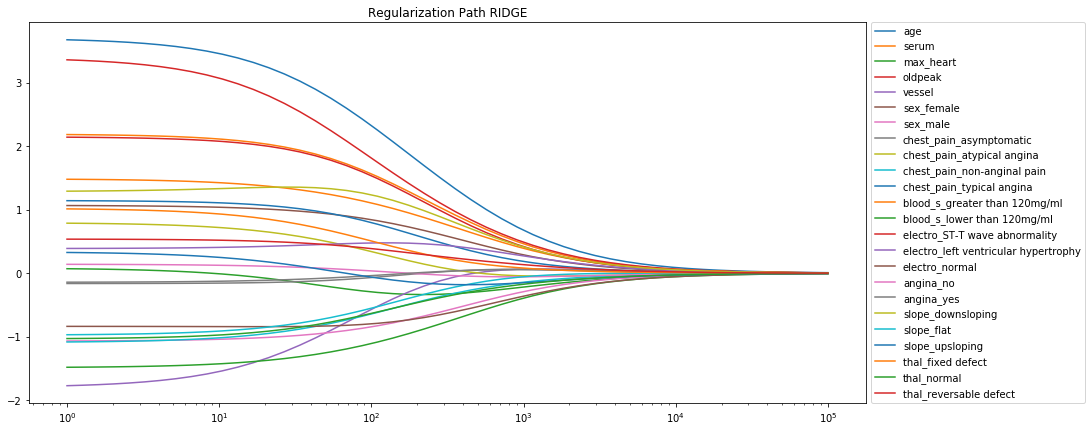

In [35]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que las variables disminuyen suavemente al valor 0. Tambien se observa que el atributo "Age" es una variable importante ya que es la que más cuesta caer a 0 de todas las variables al aumentar alpha. Pero no se distingue claramente que variables son más importantes que otras a medida que aumenta alpha. Por último se aprecia que hay variables que se inactivan rápidamente.


> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
... #plot again
```


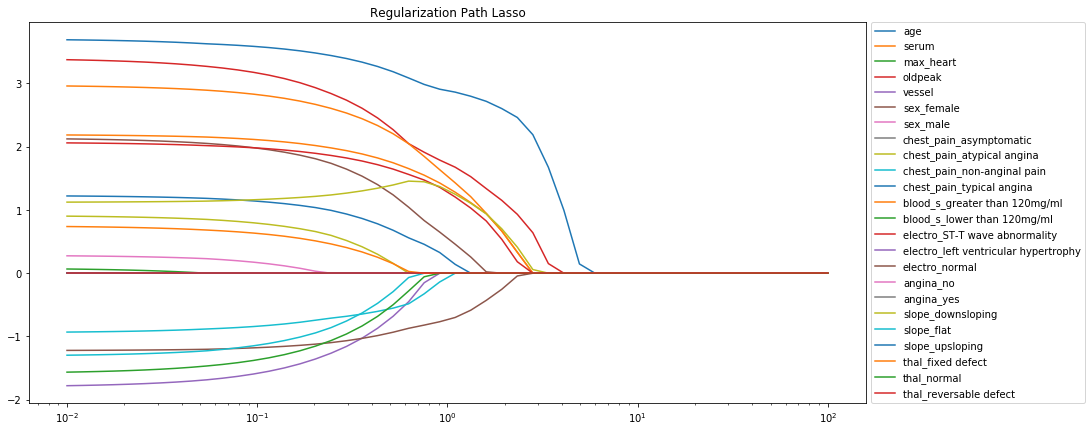

In [36]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que se puede distinguir claramente que variables se desactivan más rapidamente que otras. Al igual que Ridge, la variable "Age" es la última en inactivarse, por lo tanto tiene una mayor importancia que las demás variables.

La mejor para seleccionar atributos es Lasso ya que se puede ver una convergencia más rapida que el método de Ridge de las variables menos importantes.


> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?
```python
from ipywidgets import interactive
def train_model(param):
    model = #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))
```


In [37]:
from ipywidgets import interactive
def train_model(param):
    model = Lasso(fit_intercept=True)
    model2 = Ridge(fit_intercept=True, solver='svd')
    #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model2.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    model2.fit(Xstd_train, reg_label_train)
    print("Lasso")
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    print("Ridge")
    print("MSE train: ", mean_squared_error(reg_label_train, model2.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model2.predict(Xstd_test) ))
p_min = -5 #define your range
p_max = 5 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=5, min=-5), Output()), _dom_classes=('widget…

Cuando el parametro es -1 se obtiene el menor promedio de error cuadratico para el conjunto de test en Lasso. En cambio con parametro +1 se obtiene el menor promedio de errores cuadraticos de Ridge


> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]
```


El error propuesto es calcular el promedio del valor absoluto de los valores residuales.

In [38]:
names_regressors = df.columns

def fss(x, y, x_test, y_test, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    nro_variables = []
    errores_train = []
    errores_test = []
    while remaining and len(selected) <= k :
        score_candidates = []
        score_candidates_test = []
        nro_variables.append(len(selected))
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_t = x_test[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            predictions_test = model.fit(x_t, y_test).predict(x_t)
            residuals_train =  predictions_train - y
            residuals_test =  predictions_test - y_test
            error_candidate =  np.mean(abs(residuals_train))
            error_candidate_test =  np.mean(abs(residuals_test))
            score_candidates.append((error_candidate, candidate))
            score_candidates_test.append((error_candidate_test, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        score_candidates_test.sort()
        score_candidates_test[:] = score_candidates_test[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        best_new_score_test, best_candidate_test = score_candidates_test.pop()
        errores_train.append(best_new_score)
        errores_test.append(best_new_score_test)
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mcl = %f"%(len(indexes),best_new_score))
    return selected, errores_train, errores_test, nro_variables
  
features_fss, errores_train, errores_test, nro_variables = fss(Xstd_train, reg_label_train, Xstd_test, reg_label_test, names_regressors)
need_feat = features_fss[:5]

selected = age ...
totalvars=2, mcl = 13.264674
selected = oldpeak ...
totalvars=3, mcl = 12.988086
selected = sex_female ...
totalvars=4, mcl = 12.849271
selected = slope_flat ...
totalvars=5, mcl = 12.719084
selected = electro_left ventricular hypertrophy ...
totalvars=6, mcl = 12.655238
selected = serum ...
totalvars=7, mcl = 12.582544
selected = vessel ...
totalvars=8, mcl = 12.526250
selected = thal_fixed defect ...
totalvars=9, mcl = 12.494296
selected = chest_pain_typical angina ...
totalvars=10, mcl = 12.459058
selected = electro_ST-T wave abnormality ...
totalvars=11, mcl = 12.444076
selected = chest_pain_asymptomatic ...
totalvars=12, mcl = 12.441283
selected = sex_male ...
totalvars=13, mcl = 12.441283
selected = electro_normal ...
totalvars=14, mcl = 12.441283
selected = thal_normal ...
totalvars=15, mcl = 12.441283
selected = max_heart ...
totalvars=16, mcl = 12.442952
selected = chest_pain_atypical angina ...
totalvars=17, mcl = 12.445263
selected = chest_pain_non-anginal

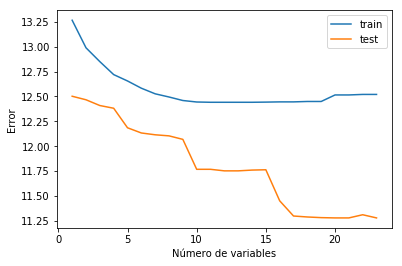

In [39]:
import matplotlib.pyplot as plt
plt.plot(nro_variables, errores_train, label="train")
plt.plot(nro_variables,errores_test, label="test")
plt.ylabel('Error')
plt.xlabel('Número de variables')
plt.legend()
plt.show()

Se puede apreciar en el gráfico que a medida que se seleccionan más variables, se tiende disminuir el error hasta seleccionar 10 variables, después de eso los datos de entrenamiento aumenta el error levemente y los datos de test siguen disminuyendo.

In [40]:
print(names_regressors[need_feat])

Index(['thal_reversable defect', 'age', 'oldpeak', 'sex_female', 'slope_flat'], dtype='object')



> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.


Para este caso, se decidio selecciónar los atributos por los que tenían mayor z-score

In [41]:
def zscore(x):
  
  #x = np.delete(X_train, i, axis=1)
  theta_hat = 0
  suma = 0
  for y in reg_label_train:
    suma += (y + reg_label_train.mean())**2
  n = len(reg_label_train)
  d = x.shape[1]
  theta_had = suma/(n-d-1)

  z_score_j = []
  for j in range(x.shape[1]):
    z_score_j.append(model.coef_[j]/(theta_had*((x.T.dot(x))[j,j])**(-1)))
  z_score_j.append(model.intercept_/(theta_had*((x.T.dot(x))[j,j])**(-1)))
  
  return z_score_j

def fss(x, y, names_x, k = 10000):

    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    model = LinearRegression(fit_intercept=True, n_jobs=1)
    predictions_train = model.fit(x, y).predict(x)

    while remaining and len(selected) <= k :
        score_candidates = []
        for candidate in remaining:
            
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            zcore_candidate =  np.mean(zscore(x_train))
            score_candidates.append((zcore_candidate, candidate))
        score_candidates.sort()
        #score_candidates[:] = score_candidates[::1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, avg_zscore = %f"%(len(indexes),best_new_score))
    return selected
  
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]
print(names_regressors[need_feat])

selected = chest_pain_atypical angina ...
totalvars=2, avg_zscore = 0.118473
selected = thal_normal ...
totalvars=3, avg_zscore = 0.088406
selected = vessel ...
totalvars=4, avg_zscore = 0.072048
selected = max_heart ...
totalvars=5, avg_zscore = 0.058955
selected = oldpeak ...
totalvars=6, avg_zscore = 0.051012
selected = age ...
totalvars=7, avg_zscore = 0.044383
selected = chest_pain_non-anginal pain ...
totalvars=8, avg_zscore = 0.039228
selected = sex_male ...
totalvars=9, avg_zscore = 0.035326
selected = sex_female ...
totalvars=10, avg_zscore = 0.031722
selected = electro_left ventricular hypertrophy ...
totalvars=11, avg_zscore = 0.029159
selected = chest_pain_asymptomatic ...
totalvars=12, avg_zscore = 0.027313
selected = serum ...
totalvars=13, avg_zscore = 0.025213
selected = chest_pain_typical angina ...
totalvars=14, avg_zscore = 0.023724
selected = electro_normal ...
totalvars=15, avg_zscore = 0.022109
selected = angina_yes ...
totalvars=16, avg_zscore = 0.020515
selected

Los atributos seleccionados fueron: 'thal_reversable defect', 'thal_normal', 'chest_pain_atypical angina', 'electro_ST-T wave abnormality' y 'vessel'


> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?
```python
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
```




Se define una funcion que implementará la técnica de selección de atributos Lasso, y graficará los resultados


In [42]:
def funtion_fake_features(D,N,sigma,x_new_train):
    alphas_ = np.logspace(2,-2,base=10)
    coefs = []
    model = Lasso(fit_intercept=True)
    for a in alphas_:
        model.set_params(alpha=a)
        model.fit(x_new_train, reg_label_train)
        coefs.append(model.coef_)
    names_regressors = range(x_new_train.shape[1])
    plt.figure(figsize=(15,7))
    contador = 0
    for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        if contador<24:
            plt.plot(alphas_, y_arr, color='k', linestyle='-')
        else:
            color = ""
            if contador%3 == 0:
                color = 'r'
            elif contador%3 == 1:
                color = 'g'
            else:
                color = 'b'
            plt.plot(alphas_, y_arr, color=color, linestyle='--')
        contador+=1
    plt.legend()
    plt.xscale('log')
    plt.title('Regularization Path Lasso with '+str(D)+' fake features and '+str(sigma)+' standard deviation')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

A continuación se toman varias muestras cambiando la desviacion estandar. Las lineas de colores representan los atributos falsos incorporado y la linea negra son atributos datos del dataset

No handles with labels found to put in legend.
No handles with labels found to put in legend.


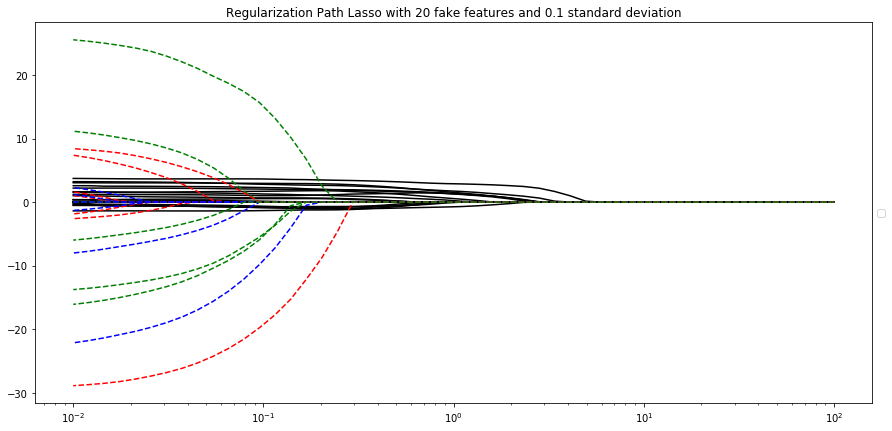

No handles with labels found to put in legend.
No handles with labels found to put in legend.


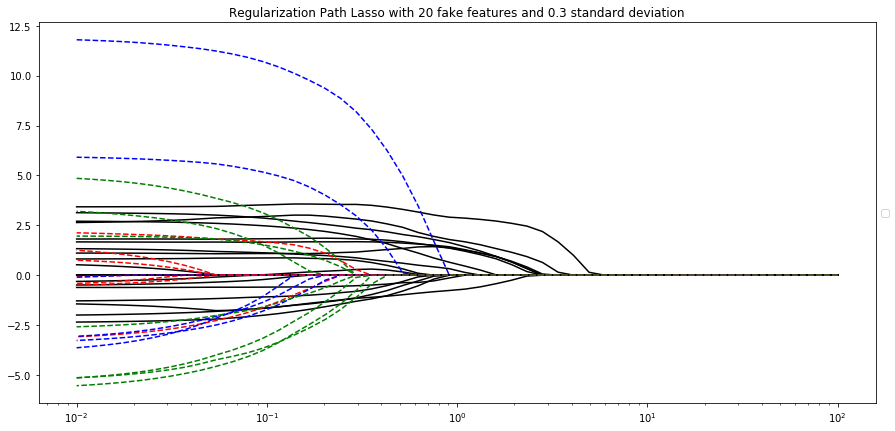

No handles with labels found to put in legend.
No handles with labels found to put in legend.


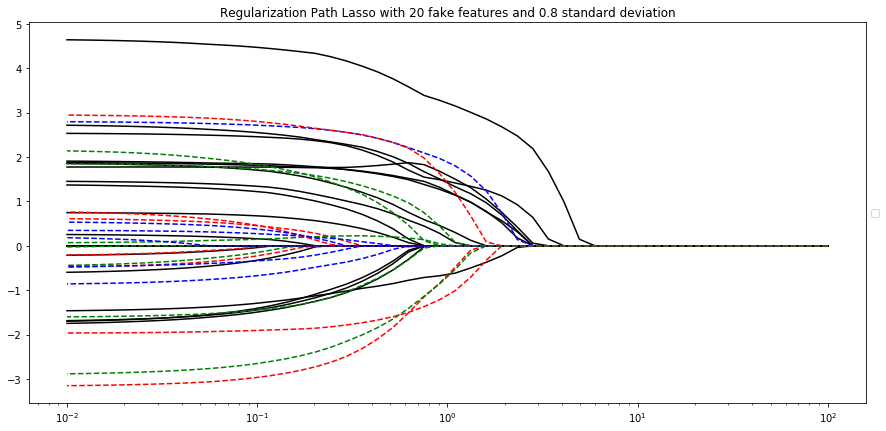

In [43]:
D = 20 #number of fake features
N = 184
mu, sigma = 0, 0.1 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
funtion_fake_features(D,N,sigma,X_new_train)

D = 20 #number of fake features
N = 184
mu, sigma = 0, 0.3 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
funtion_fake_features(D,N,sigma,X_new_train)

D = 20 #number of fake features
N = 184
mu, sigma = 0, 0.8 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
funtion_fake_features(D,N,sigma,X_new_train)

Como se aprecia en los gráficos, si depende de la desviación estandar porque al tener menos ruidos, los valores se parecen mucho entre sí por lo tanto es más dificil distinguir sí afectó al resultado o no, por lo tanto son las primeras variables en desaparecer. En cambio. Mientras que con un mayor ruido se puede llegar la probabilidad que un dato falso aumente o disminuya más cuando cambia el target esperado y por lo tanto la máquina puede pensar que quizás es más importante que otra.

Se surgió la duda de que estos que se agregan deberían estar normalizado al igual que los demás datos antes de llamar a la funcion funtion_fake_features:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


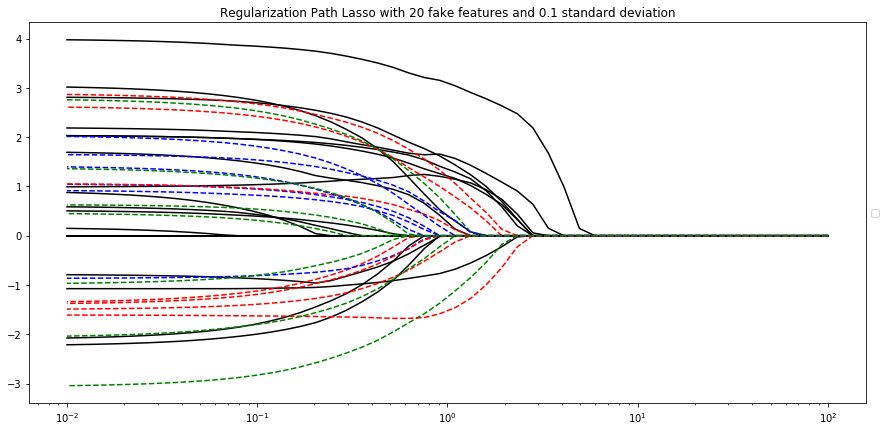

No handles with labels found to put in legend.
No handles with labels found to put in legend.


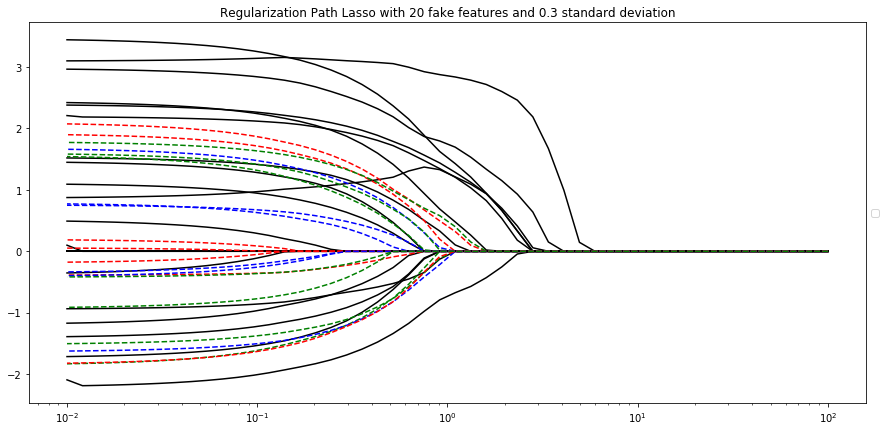

No handles with labels found to put in legend.
No handles with labels found to put in legend.


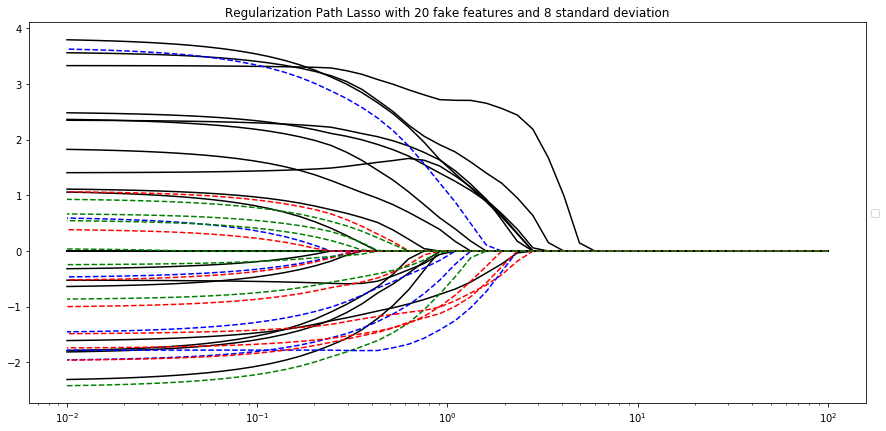

In [44]:
from sklearn.preprocessing import StandardScaler 

D = 20 #number of fake features
N = 184
mu, sigma = 0, 0.1 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
std = StandardScaler()
std.fit(X_new_train)
X_new_train = std.transform(X_new_train)
funtion_fake_features(D,N,sigma,X_new_train)

D = 20 #number of fake features
N = 184
mu, sigma = 0, 0.3 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
std = StandardScaler()
std.fit(X_new_train)
X_new_train = std.transform(X_new_train)
funtion_fake_features(D,N,sigma,X_new_train)

D = 20 #number of fake features
N = 184
mu, sigma = 0, 8 # mean and standard deviation
F = np.random.normal(loc = mu, scale=sigma, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
std = StandardScaler()
std.fit(X_new_train)
X_new_train = std.transform(X_new_train)
funtion_fake_features(D,N,sigma,X_new_train)

Efectivamente, como se había pensado, al normalizar los datos los gráficos dan parecidos y estas no dependen de la desviación estandar fijada porque al normalizar la desviación estandar da 1 para todos.

En general los valores falsos se cancelan en su mayoría junto con las primeras variables reales. Pero puede haber una por estadistica solamente que se cancele después porque justo coincidió que su variación iba a la par con la variación de la presión sanguinea

### Detectar una enfermedad 

Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.
```python
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 
```


In [45]:
mask_norm = class_label_train == 0 
model = Lasso(fit_intercept=True)
#model = Ridge(fit_intercept=True, solver='svd')
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 


> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).
```python
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)
```



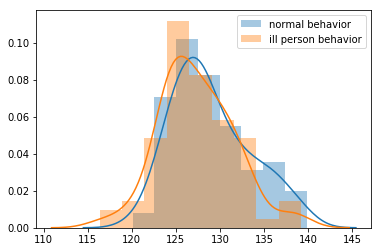

In [46]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.legend()
plt.show()


Se considera que bajo los 127 como el umbral p_low

In [47]:
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
p_up = 200
p_low = 127
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)


> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*
```python
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```


In [48]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.5706521739130435
Score test:  0.5813953488372093


Los resultados son mayores que el mínimo y aunque se puede cambiar el umbral, el resultado varíada muy poco ya que la distribución de pacientes enfermos con los sanos por su presión sanguinea se superponen, lo que provoca que no se puede elegir un umbral para separar los dos casos de forma categórica.

Lo que podría mejorar los resultados es sí se hubiera entrenado con Ridge por ejemplo. Para este caso se tiene que:

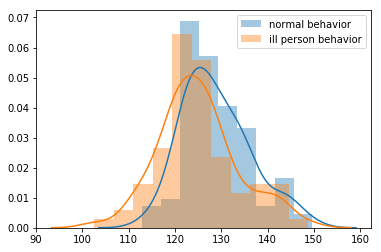

In [49]:
mask_norm = class_label_train == 0 
model_2 = Ridge(fit_intercept=True, solver='svd')
model_2.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr_2 = model_2.predict(Xstd_train) 
blood_p_te_2 = model_2.predict(Xstd_test) 

import seaborn as sns
sns.distplot(blood_p_tr_2[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr_2[~mask_norm], label="ill person behavior")
plt.legend()
plt.show()

Se elige un umbral de 124 y se calculan los errores

In [50]:
p_up = 200
p_low = 124
pred_train_2 = predict_umbr(blood_p_tr_2, p_up, p_low)
pred_test_2 = predict_umbr(blood_p_te_2, p_up, p_low)

print("Score train: ",accuracy_score(class_label_train, pred_train_2))
print("Score test: ",accuracy_score(class_label_test, pred_test_2)) 

Score train:  0.6195652173913043
Score test:  0.6744186046511628


En este caso el acurracy da mayor y esto se debe que con Ridge se superponían menos los gráficos que con Lasso, por lo tanto se podía encontrar un umbral que los separaba más entre sanos y enfermos


> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```


In [51]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8695652173913043
Score test:  0.8023255813953488


D:\Programas\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Claramente con perceptron da mejores resultados, la diferencia es que cuando se utilizó Lasso se eligió un umbral solo mirando la presión sanguinea, mientras que para Perceptron se utilizó todas los demás atributos para predecir si la persona esta enferma o no. Entonces a pesar de que la presión sanguinea sea importante, las demás variable(por si sola o combinadas) deben entregar alguna información adicional para predecir los resultados.


> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```


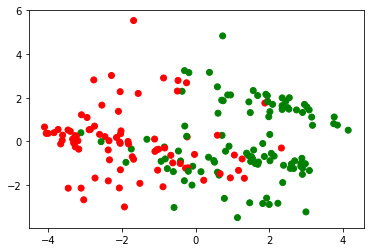

In [52]:
from sklearn.decomposition import PCA


colors = []
for i in class_label_train:
  if (i == 0):
    colors.append('green')
  else:
    colors.append('red')
  

d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1], color = colors)
plt.show()

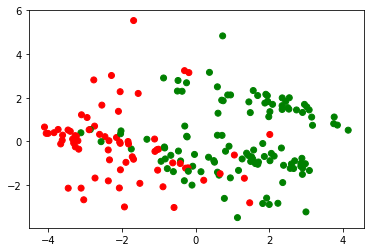

In [53]:
# Luego hay que colorear segun las clases predichas

colors = []
for i in pred_train:
  if (i == 0):
    colors.append('green')
  else:
    colors.append('red')

plt.scatter(X_pca_train[:,0], X_pca_train[:,1], color = colors)
plt.show()


> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente
```python
from sklearn.decomposition import FastICA
...
```


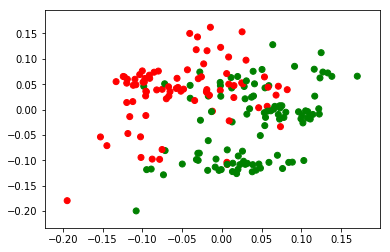

In [54]:
from sklearn.decomposition import FastICA


colors = []
for i in class_label_train:
  if (i == 0):
    colors.append('green')
  else:
    colors.append('red')

ica = FastICA(n_components=2)
ica_model = ica.fit(Xstd_train)
ica_model.fit(Xstd_train)
X_ica_train = ica_model.transform(Xstd_train)
X_ica_test = ica_model.transform(Xstd_test)
plt.scatter(X_ica_train[:,0], X_ica_train[:,1], color = colors)
plt.show()

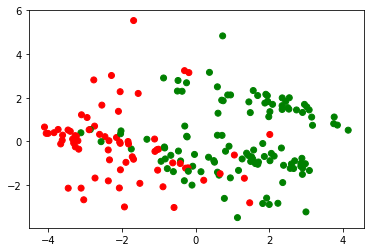

In [55]:
# Ahora con ICA hay que colorear segun las clases predichas

colors = []
for i in pred_train:
  if (i == 0):
    colors.append('green')
  else:
    colors.append('red')

plt.scatter(X_pca_train[:,0], X_pca_train[:,1], color = colors)
plt.show()


> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
reg = model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

mae_train_original = mean_absolute_error(reg_label_train, reg_pred_train)
mae_test_original = mean_absolute_error(reg_label_test, reg_pred_test)

reg = model.fit(X_pca_train, reg_label_train)

reg_pred_train = model.predict(X_pca_train)
reg_pred_test = model.predict(X_pca_test)

mae_train_PCA = mean_absolute_error(reg_label_train, reg_pred_train)
mae_test_PCA = mean_absolute_error(reg_label_test, reg_pred_test)

print("MAE train, Original: ", mae_train_original)
print("MAE train, PCA: ", mae_train_PCA)
print("\n")
print("MAE test, Original: ", mae_test_original)
print("MAE test, PCA: ", mae_test_PCA)

MAE train, Original:  12.520139292308562
MAE train, PCA:  13.623160273241263


MAE test, Original:  13.66061335199971
MAE test, PCA:  14.156166532280508


Se puede apreciar que la calidad empeora al utilizar PCA, sin embargo, no lo hace de manera severa (refiriéndonos solo al valor numérico, pues puede ser que cualitativamente sí empeore gravemente dado un aumento menor en los valores).
De manera lógica es esperable que empeore la calidad, pues se está usando menos información para realizar la predicción. Sin embargo, teoricamente se tiene que sí podría mejorar la calidad de la predicción, ya que la disminución de la dimensionalidad se está haciendo de manera tal que se mantengan los atributos más importantes para la predicción, en otras palabras, se están desechando los atributos que son menos significativos y que pueden estar afectando negativamente el desempeño del clasificador.

Midiendo la calidad de la predicción con el error absoluto medio, proponemos seleccionar el número de componentes a considerar basándonos en esta métrica.

In [57]:
def PCA_d(i): 
  
  d = i
  pca_model = PCA(n_components=d)
  pca_model.fit(Xstd_train)
  X_pca_train = pca_model.transform(Xstd_train)
  X_pca_test = pca_model.transform(Xstd_test)

  model = LinearRegression(fit_intercept=True)
  reg = model.fit(X_pca_train, reg_label_train)
  reg_pred_train = model.predict(X_pca_train)
  reg_pred_test = model.predict(X_pca_test)

  mae_train_PCA = mean_absolute_error(reg_label_train, reg_pred_train)
  mae_test_PCA = mean_absolute_error(reg_label_test, reg_pred_test)

  #print("MSE train, PCA: ", mse_train_PCA)
  return mae_test_PCA
  
list_dimensions = []
list_maes = []

minimo = 1000
d_min = -1

for i in list(range(Xstd_train.shape[1]))[2:]:
  
  list_dimensions.append(i)
  list_maes.append(PCA_d(i))
  
  if(PCA_d(i) < minimo):
    minimo = PCA_d(i)
    d_min = i

print("Usar dimensión = ", d_min)

Usar dimensión =  16


<a id="segundo"></a>
## 2. Estimación de edad de personas

### Enunciado y librerías

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="40%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

In [59]:
import scipy.io as sio
mat_file = sio.loadmat("AgeGenderClassification/eventrain.mat")
mat_file_test = sio.loadmat("AgeGenderClassification/eventest.mat")

Mientras que para acceder a la información como tal:

In [60]:
data = mat_file["trcoll"][0][0] # is "tecoll" for testing set
age_true = data[1] #target
genFeat = data[0]   # Contextual features
genClass = data[2]
ffcoefs = data[3]   # Fisherface space
facePosSize = data[9]

data_test = mat_file_test["tecoll"][0][0] # is "tecoll" for testing set
age_true_test = data_test[1] #target
genFeat_test = data_test[0]   # Contextual features
genClass_test = data_test[2]
ffcoefs_test = data_test[3]   # Fisherface space
facePosSize_test = data_test[9]

In [61]:
'''df_dict = {}
nombreAtributos = ("age_true,"+"genFeat,"*14+"genClass,"+"ffcoefs,"*37+"facePosSize,"*6+"facePosSize").split(",")
contador = 0
for i in [age_true,genFeat,genClass,ffcoefs,facePosSize]:
  for atributo in range(i.shape[1]):
    df_dict[nombreAtributos[contador]+"_"+str(contador)] = i[:,atributo]
    contador+=1

df = pd.DataFrame(data = df_dict)'''


'df_dict = {}\nnombreAtributos = ("age_true,"+"genFeat,"*14+"genClass,"+"ffcoefs,"*37+"facePosSize,"*6+"facePosSize").split(",")\ncontador = 0\nfor i in [age_true,genFeat,genClass,ffcoefs,facePosSize]:\n  for atributo in range(i.shape[1]):\n    df_dict[nombreAtributos[contador]+"_"+str(contador)] = i[:,atributo]\n    contador+=1\n\ndf = pd.DataFrame(data = df_dict)'

In [62]:
df.head()

,age,serum,max_heart,oldpeak,vessel,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-anginal pain,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,322.0,109.0,2.4,3.0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,67.0,564.0,160.0,1.6,0.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,57.0,261.0,141.0,0.3,0.0,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,263.0,105.0,0.2,1.0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
4,74.0,269.0,121.0,0.2,1.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0



Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:

In [63]:
#!wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.





Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).

In [64]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

### Desarrollo

In [65]:
import numpy as np
import pandas as pd
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Se analizó la data y se decidió seleccionar las siguientes conjunto de datos: age_true, genFeat, genClass, ffcoefs y facePosSize. Descomprimiento los distintos conjunto de datos, en total la matriz tendría 59 atributos. El siguiente código se realiza la elaboración de esta matriz:

In [66]:
df_dict = {}
nombreAtributos = ("age_true,"+"genFeat,"*14+"genClass,"+"ffcoefs,"*37+"facePosSize,"*6+"facePosSize").split(",")
contador = 0
for i in [age_true,genFeat,genClass,ffcoefs,facePosSize]:
  for atributo in range(i.shape[1]):
    df_dict[nombreAtributos[contador]+"_"+str(contador)] = i[:,atributo]
    contador+=1

df = pd.DataFrame(data = df_dict)

df_dict_test = {}
nombreAtributos = ("age_true,"+"genFeat,"*14+"genClass,"+"ffcoefs,"*37+"facePosSize,"*6+"facePosSize").split(",")
contador = 0
for i in [age_true_test,genFeat_test,genClass_test,ffcoefs_test,facePosSize_test]:
  for atributo in range(i.shape[1]):
    df_dict_test[nombreAtributos[contador]+"_"+str(contador)] = i[:,atributo]
    contador+=1

df_test = pd.DataFrame(data = df_dict_test)

reg_label_train = df.pop('age_true_0').values
df = pd.get_dummies(df)
X_train = df.values

reg_label_test = df_test.pop('age_true_0').values
df_test = pd.get_dummies(df_test)
X_test = df_test

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (3500, 59)
Test:  (1050, 59)


Luego se estandariza los datos:

In [67]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float32, float64 were all converted to float64 by StandardScaler.
  """


Se aplica lineal regresión:

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)
reg = model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

Se calcula z-score y f-score y se compara con el peso:

In [69]:
#Z-score
theta_hat = 0
suma = 0
for y in reg_label_train:
  suma += (y + reg_label_train.mean())**2
n = len(reg_label_train)
d = X_train.shape[1]
theta_had = suma/(n-d-1)

z_score_j = []
for j in range(X_train.shape[1]):
  z_score_j.append(model.coef_[j]/(theta_had*((X_train.T.dot(X_train))[j,j])**(-1)))
z_score_j.append(model.intercept_/(theta_had*((X_train.T.dot(X_train))[j,j])**(-1)))

#Valores f-score obtenidos por funciones de sklearn

from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(Xstd_train, reg_label_train, center=True)

#print(fscores)
#print(pvalues)

# Crear tabla

d = {} 
d["i-Predictor"] = list(df.keys())

#for i in range(len(fscores)):
#  d["i-Predictor"].append(i)

d["Z-Score"] = z_score_j[:-1]
d["F-Score"] = fscores  
d["Peso"] = abs(reg.coef_)
  
tabla = pd.DataFrame(d)
tabla

,i-Predictor,Z-Score,F-Score,Peso
0,genFeat_1,-1.707675e+03,6.055381e-01,5.713700e-01
1,genFeat_2,-5.538839e+03,4.008938e+02,2.920673e+00
2,genFeat_3,2.839943e+00,8.720064e+01,8.531421e-01
3,genFeat_4,4.786653e+00,3.080981e+02,4.699351e+00
4,genFeat_5,9.272538e+00,5.381816e-01,5.688036e-01
5,genFeat_6,-3.829799e+01,2.100310e+02,3.290887e+00
6,genFeat_7,-3.859753e-03,1.400886e-02,1.725548e-01
7,genFeat_8,-2.535062e-02,2.049906e+00,1.146102e+00
8,genFeat_9,2.596664e+00,3.207911e+02,2.652514e+00
9,genFeat_10,-6.108977e+01,5.644262e-01,8.101277e-01


In [70]:
#tabla ordenada por F-score
tabla = pd.DataFrame(d).sort_values('F-Score', ascending=False)
tabla.head()

,i-Predictor,Z-Score,F-Score,Peso
17,ffcoefs_18,-0.008162,431.187390,4.775406
1,genFeat_2,-5538.839034,400.893809,2.920673
15,ffcoefs_16,0.007200,388.845940,3.600595
8,genFeat_9,2.596664,320.791059,2.652514
11,genFeat_12,1.600669,314.925858,1.634028


In [71]:
#tabla ordenada por Z-score
tabla = pd.DataFrame(d).sort_values('Z-Score', ascending=False)
tabla.head()

,i-Predictor,Z-Score,F-Score,Peso
54,facePosSize_55,1.551184e+18,6.297893,6.537254e+12
57,facePosSize_58,1.430440e+18,208.584700,1.734000e+13
52,facePosSize_53,1.409686e+18,7.143305,6.466752e+12
13,genFeat_14,1.624786e+02,246.011750,6.846471e+00
4,genFeat_5,9.272538e+00,0.538182,5.688036e-01


In [72]:
#Tabla ordenada por Peso
tabla = pd.DataFrame(d).sort_values('Peso', ascending=False)
tabla.head()

,i-Predictor,Z-Score,F-Score,Peso
57,facePosSize_58,1.430440e+18,208.584700,1.734000e+13
56,facePosSize_57,-2.957690e+18,6.714788,1.300094e+13
55,facePosSize_56,-7.151666e+17,209.208214,8.672493e+12
53,facePosSize_54,-7.154275e+17,207.895960,8.668806e+12
54,facePosSize_55,1.551184e+18,6.297893,6.537254e+12


De los datos anteriores se puede decir que por peso y por Z-score los atributos más importantes son los datos de facePosSize

In [73]:
abs(reg_label_train - reg_pred_train)

array([ 8.43951516, 15.17249961,  6.0610869 , ...,  2.55738395,
        3.70404497,  9.25152849])

A continuación se analiza el gráfico quantile-quantile

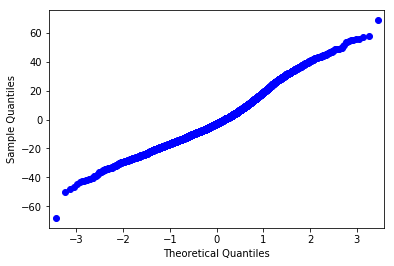

In [74]:
import statsmodels.api as sm
import pylab

sm.qqplot((reg_label_train - reg_pred_train))
pylab.show()

Se puede decir a partir del gráfico que es razonable la hipótesis de que los residuos del modelo tienen una distribución normal.

Luego se analiza
- Mean absolute error regression loss
- Mean squared error regression loss
- Mean absolute percentage error

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))
print("\n")
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
print("\n")
print("MAPE train: ", mean_absolute_percentage_error(reg_label_train, reg_pred_train))
print("MAPE test: ", mean_absolute_percentage_error(reg_label_test, reg_pred_test))

MAE train:  14.167919404060845
MAE test:  14.79478003211652


MSE train:  317.91364795147643
MSE test:  360.5690791147712


MAPE train:  231.02218254272566
MAPE test:  228.4664921650154


Como tanto el error del test y el error del entrenamiento son similares o un poco mayor entonces la máquina no solo se queda con su conjunto de entrenamiento si no que los valores de prueba tiene un error similar. No se aprecia sobreajuste a simple vista.

In [76]:
from sklearn.model_selection import KFold

#Leave one out
K=Xstd_train.shape[0]
kf = KFold(n_splits=K, shuffle=True)
mape_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mape_fold =  np.mean( np.abs((reg_label_train[val] - yhat_kfold_val) / reg_label_train[val])) * 100
    mape_cv += mape_fold
mape_cv_loo = mape_cv / K

print(mape_cv_loo)

236.42132369362358


A continuación se analiza la selección atributos por Lazzo y Ridge:

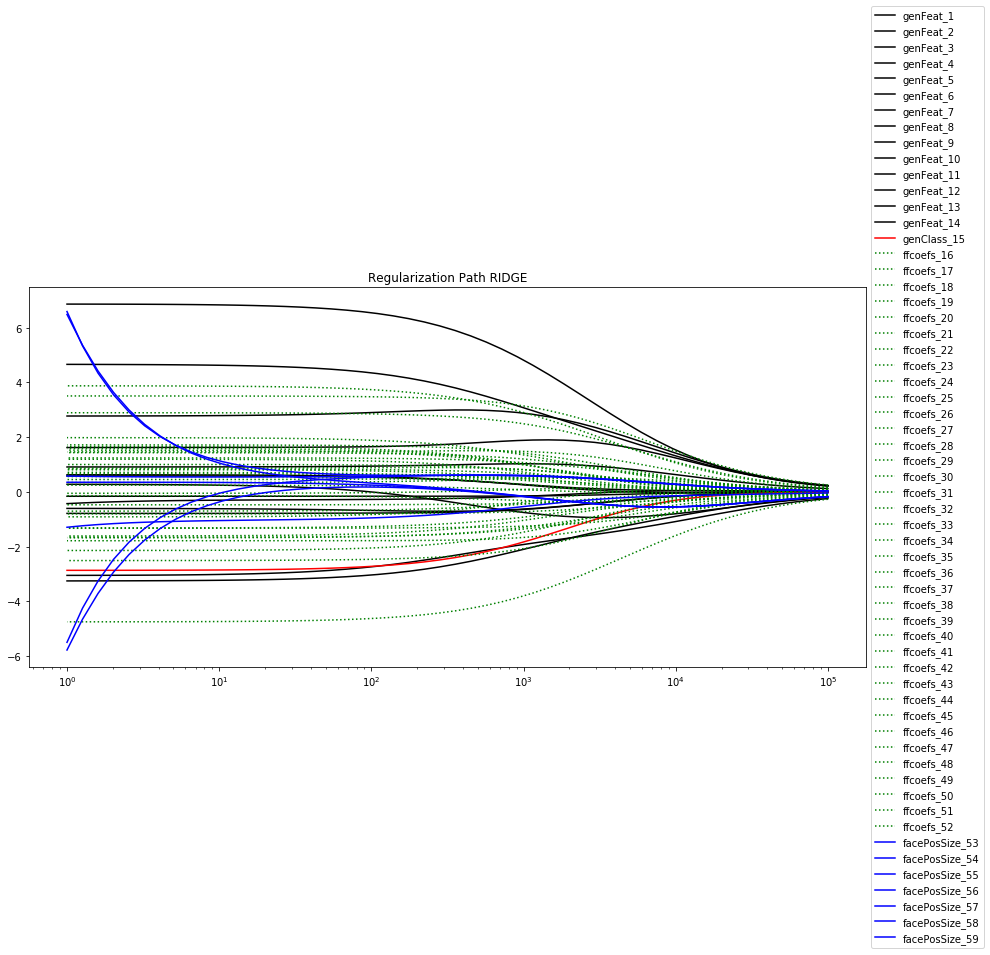

In [77]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns


plt.figure(figsize=(15,7))
contador = 0
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if contador<genFeat.shape[1]:
        color='k'
        linestyle='-'
    elif contador<genFeat.shape[1] + genClass.shape[1]:
        color = 'r'
        linestyle='-'
    elif contador<genFeat.shape[1] + genClass.shape[1] + ffcoefs.shape[1]:
        color = 'g'
        linestyle=':'
    else:
        color = 'b'
        linestyle='-'
    plt.plot(alphas_, y_arr, color=color, linestyle=linestyle, label=label)
    contador+=1
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

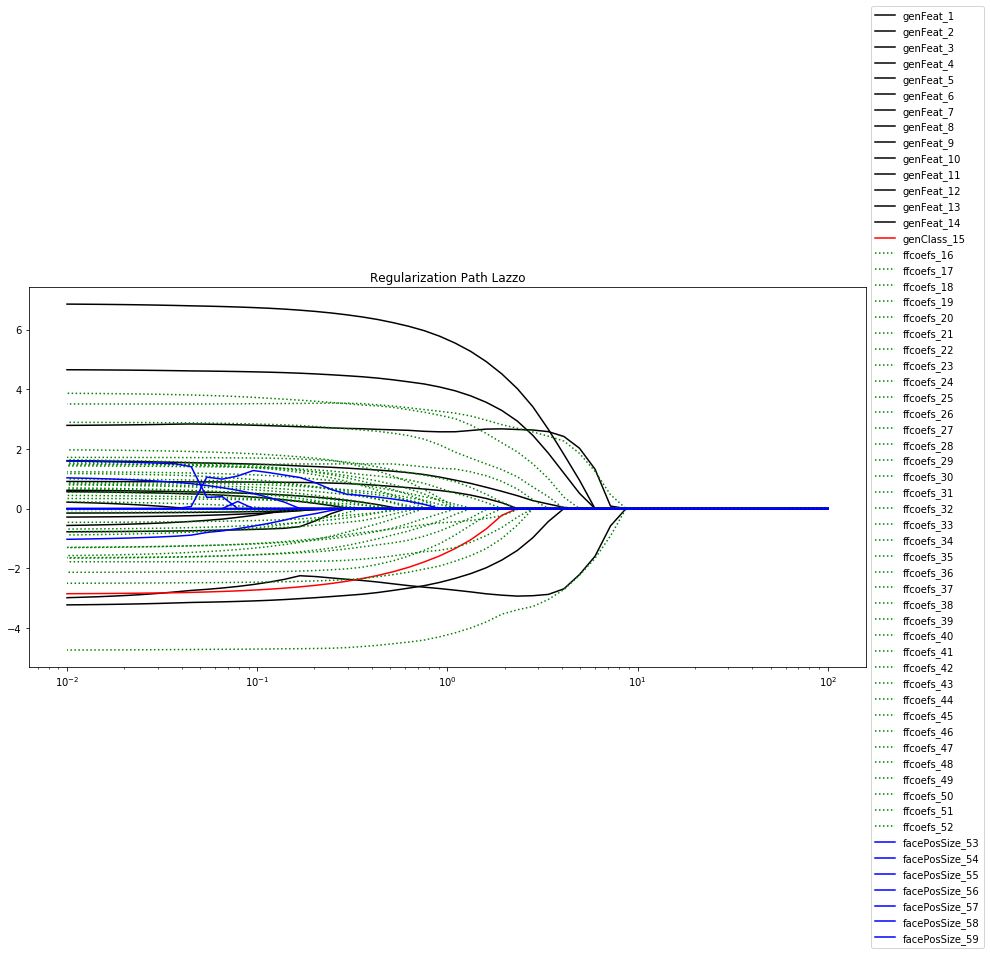

In [78]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
contador = 0
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if contador<genFeat.shape[1]:
        color='k'
        linestyle='-'
    elif contador<genFeat.shape[1] + genClass.shape[1]:
        color = 'r'
        linestyle='-'
    elif contador<genFeat.shape[1] + genClass.shape[1] + ffcoefs.shape[1]:
        color = 'g'
        linestyle=':'
    else:
        color = 'b'
        linestyle='-'
    plt.plot(alphas_, y_arr, color=color, linestyle=linestyle, label=label)
    contador+=1
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lazzo')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

De lo anterior se puede apreciar que facePosSize tiene un comportamiento más cambiante y que a simple vista los atributos GenFeat son los más importantes

In [79]:
from ipywidgets import interactive
def train_model(param):
    model = Lasso(fit_intercept=True)
    model2 = Ridge(fit_intercept=True, solver='svd')
    #define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model2.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    model2.fit(Xstd_train, reg_label_train)
    print("Lasso")
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    print("MAPE train: ", mean_absolute_percentage_error(reg_label_train, model.predict(Xstd_train) ))
    print("MAPE test: ", mean_absolute_percentage_error(reg_label_test, model.predict(Xstd_test) ))
    print("Ridge")
    print("MSE train: ", mean_squared_error(reg_label_train, model2.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model2.predict(Xstd_test) ))
    print("MAPE train: ", mean_absolute_percentage_error(reg_label_train, model2.predict(Xstd_train) ))
    print("MAPE test: ", mean_absolute_percentage_error(reg_label_test, model2.predict(Xstd_test) ))
p_min = -5
p_max = 5
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=5, min=-5), Output()), _dom_classes=('widget…

Con alpha 10^-2 se puede apreciar un menor mean absolute percentage error

In [80]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            error_candidate =  mean_absolute_percentage_error(y, predictions_train)
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mape = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:10]
print(names_regressors[need_feat])

selected = genFeat_9 ...
totalvars=2, mape = 364.250659
selected = genFeat_2 ...
totalvars=3, mape = 278.002139
selected = ffcoefs_18 ...
totalvars=4, mape = 261.534807
selected = ffcoefs_16 ...
totalvars=5, mape = 255.338844
selected = ffcoefs_17 ...
totalvars=6, mape = 245.500486
selected = genFeat_14 ...
totalvars=7, mape = 239.270905
selected = genFeat_4 ...
totalvars=8, mape = 233.998932
selected = genFeat_6 ...
totalvars=9, mape = 227.238891
selected = ffcoefs_45 ...
totalvars=10, mape = 224.376817
selected = ffcoefs_30 ...
totalvars=11, mape = 221.760713
selected = ffcoefs_35 ...
totalvars=12, mape = 220.500951
selected = ffcoefs_40 ...
totalvars=13, mape = 219.631779
selected = ffcoefs_31 ...
totalvars=14, mape = 218.779440
selected = ffcoefs_39 ...
totalvars=15, mape = 217.976159
selected = genFeat_12 ...
totalvars=16, mape = 217.046398
selected = ffcoefs_41 ...
totalvars=17, mape = 216.160679
selected = genFeat_3 ...
totalvars=18, mape = 215.518478
selected = genFeat_7 ...
to

En el código anterior se puede apreciar que los atributos más relevante con fss son: 'facePosSize_59', 'genFeat_9', 'genFeat_2', 'ffcoefs_18', 'ffcoefs_16', 'ffcoefs_17', 'genFeat_14', 'genFeat_4', 'genFeat_6' y 'ffcoefs_45'

In [81]:
from sklearn.decomposition import PCA

d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
reg = model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

mape_train_original = mean_absolute_percentage_error(reg_label_train, reg_pred_train)
mape_test_original = mean_absolute_percentage_error(reg_label_test, reg_pred_test)

reg = model.fit(X_pca_train, reg_label_train)

reg_pred_train = model.predict(X_pca_train)
reg_pred_test = model.predict(X_pca_test)

mape_train_PCA = mean_absolute_percentage_error(reg_label_train, reg_pred_train)
mape_test_PCA = mean_absolute_percentage_error(reg_label_test, reg_pred_test)

print("MAPE train, Original: ", mape_train_original)
print("MAPE train, PCA: ", mape_train_PCA)
print("\n")
print("MAPE test, Original: ", mape_test_original)
print("MAPE test, PCA: ", mape_test_PCA)

MAPE train, Original:  231.02218254272566
MAPE train, PCA:  383.10863638812395


MAPE test, Original:  228.4664921650154
MAPE test, PCA:  352.09621161216035


In [82]:
def PCA_d(i): 
  
  d = i
  pca_model = PCA(n_components=d)
  pca_model.fit(Xstd_train)
  X_pca_train = pca_model.transform(Xstd_train)
  X_pca_test = pca_model.transform(Xstd_test)

  model = LinearRegression(fit_intercept=True)
  reg = model.fit(X_pca_train, reg_label_train)
  reg_pred_train = model.predict(X_pca_train)
  reg_pred_test = model.predict(X_pca_test)

  mape_train_PCA = mean_absolute_percentage_error(reg_label_train, reg_pred_train)
  mape_test_PCA = mean_absolute_percentage_error(reg_label_test, reg_pred_test)

  #print("MSE train, PCA: ", mse_train_PCA)
  return mape_test_PCA
  
list_dimensions = []
list_maes = []

minimo = 1000
d_min = -1

for i in list(range(Xstd_train.shape[1]))[2:]:
  
  list_dimensions.append(i)
  list_maes.append(PCA_d(i))
  
  if(PCA_d(i) < minimo):
    minimo = PCA_d(i)
    d_min = i

print("Usar dimensión = ", d_min)

Usar dimensión =  56


In [83]:
# Crear tabla

d = {} 

d["reg_pred_test"] = reg_pred_test
d["reg_label_test"] = reg_label_test  
  
tabla = pd.DataFrame(d)
tabla

,reg_pred_test,reg_label_test
0,29.120403,28
1,13.866350,28
2,13.016208,28
3,27.283069,28
4,29.989827,28
5,31.126135,28
6,28.881167,28
7,28.712971,28
8,28.546736,28
9,27.046708,28


Los resultados dan parecidos en la mayoría de los cosas pero hay otros que la diferencia es enorme. Quizás se pudo haber trabajado desde un inicio con menos atributo ya que durante el desarrollo del trabajo se deduce que hay muchos atributos que no son importante.